# University of Florida LoPucki Bankruptcy Database

What: A DB designed by academics for academic research.  Discontinued EO 2022 and made free then.  I will need to add 2023 cases

Use: I will use this as train data to define varaibles and parameters and use them to predict future US bankruptcy cases

In [1]:
#import modules
import numpy as np
import pandas as pd

In [5]:
# .read_CSV gave an error, here I am using .read_excel()
db = pd.read_excel('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint 1/Florida-UCLA-LoPucki Bankruptcy Research Database 1-12-2023/Florida-UCLA-LoPucki Bankruptcy Research Database 1-12-2023.xlsx')

In [14]:
#Shape?
db.shape

(1218, 217)

We have 1,218 entries of 'large' US bankruptcy cases (large defined by BS assets over `$100 MM` in 1980 dollars, equates to  ~$300M today.)
217 columns

In [20]:
db.describe().T
#these are my numerical columns

,count,mean,std,min,25%,50%,75%,max
Assets1Before,913.0,3910.948225,26390.596880,132.458000,375.607000,743.900000,2043.00000,691063.000000
Assets2Before,546.0,1784.730317,3992.352932,30.666000,335.937250,557.235000,1491.74825,37703.000000
Assets3Before,318.0,1311.643469,3180.981429,2.927000,293.112750,501.796500,1173.59000,37744.000000
AssetsBefore,1218.0,3335.617303,22942.603266,132.458000,363.693500,670.075000,1810.64925,691063.000000
AssetsCurrDollar,1218.0,4957.605911,31495.819908,303.000000,597.000000,1105.000000,2840.25000,937411.000000
...,...,...,...,...,...,...,...,...
YearConfirmed,1096.0,2004.726277,9.367577,1982.000000,1999.000000,2004.000000,2012.00000,2022.000000
YearDisposed,1182.0,2004.728426,9.233348,1982.000000,1999.000000,2004.000000,2012.00000,2022.000000
YearEmerged,817.0,2004.282742,9.730542,1982.000000,1997.000000,2003.000000,2012.00000,2022.000000
YearFiled,1218.0,2003.649425,9.646134,1980.000000,1998.000000,2002.000000,2010.00000,2022.000000


### Reproducing Some of the Numerical Data Definitions from the supplied data dictionary (Protocols PDF)

__Assets1Before__ - Total assets shown on the Date10k1Before. If no amount is Field is complete available from that source, but an amount for the same year is available

__Assets2Before__ - Total assets shown on the Date10k2Before. If no amount is available from that source, but an amount for the same year is available from a later 10-K, use the value from the later 10-K. If the relevant amount is restated in a later 10-K, use the restated amount. The BRD has no regular procedure for gathering restated amounts.

__Assets3Before__ - Total assets shown on the Date10k3Before. If no amount is available from that source, but an amount for the same year is available from a later 10-K, use the value from the later 10-K. If the relevant amount is restated in a later 10-K, use the restated amount. The BRD has no regular procedure for gathering restated amounts.

__AssetsBefore__ - Total assets from the last 10-K filed before bankruptcy. An update query selects this number from Assets1Before, Assets2Before, or Assets3Before.

__AssetsCurrDollar__ - AssetsBefore shown in current dollars. The adjustment to current dollars is made by multiplying AssetsBefore by the ratio of the current consumer price index to the consumer price index at bankruptcy (CPIndexAtFiling). We revise AssetsCurrDollar monthly, using the most recent monthly consumer price index number available.

****

# Next Steps
### It's clear there is a ton of data here, from the data dictionary I can see that while these columns are complete, some are noted to have missing information.  This will probably affect what kind of analysis I can do on certain columns

There are some interesting datafields, such as whether there was a committee appointed to represent retirees and the consumer price index during the month filed.  I will need to evaluate which of these are useful.

Some that stand out to me:


*CPI index at Filing* - may be interesting to see if inflation is relevant for any of these.  A note of caution, I know there was inflation sometime in the 70s-80s.  As interest rates are impactful on corporate debt

*Cusip6* - securities information.  I could potentially look up bond prices to see where these settled (what cents on the dollar investors recieved, if any)

*DateCEOBegin* - could be interesting to see how tenured a CEO is at the time of bankruptcy.  There's a lot of nuance here, though, as a CEO could come in right before filing to "try and right the ship."

There are a lot of dates, which could allow me to answer more "qualitative" questions such as how long is the average proceeding, does it vary by size of company (almost certainly).

A lot of names, could be fun to see if there are any CEO repeats in here.

DIP loans - how much money the bankrupt co gets to keep operations going, this could be relevant today: how much will the next bankrup company get to operate?

EBIT / EBITDA - relevant as that is the most often cited metric in the Debt world

__Emerge__ - Y/N on whether or not the company emerged. This could be a potential Y variable in my analysis

Intercompany claims - could be a way to measure corporate 'complexity'


I'll stop here for now.. there's a lot...

***
### I want to visualize the holes in this dataset, I found a fun pakcage I will use here to visually see the gaps:

https://github.com/ResidentMario/missingno

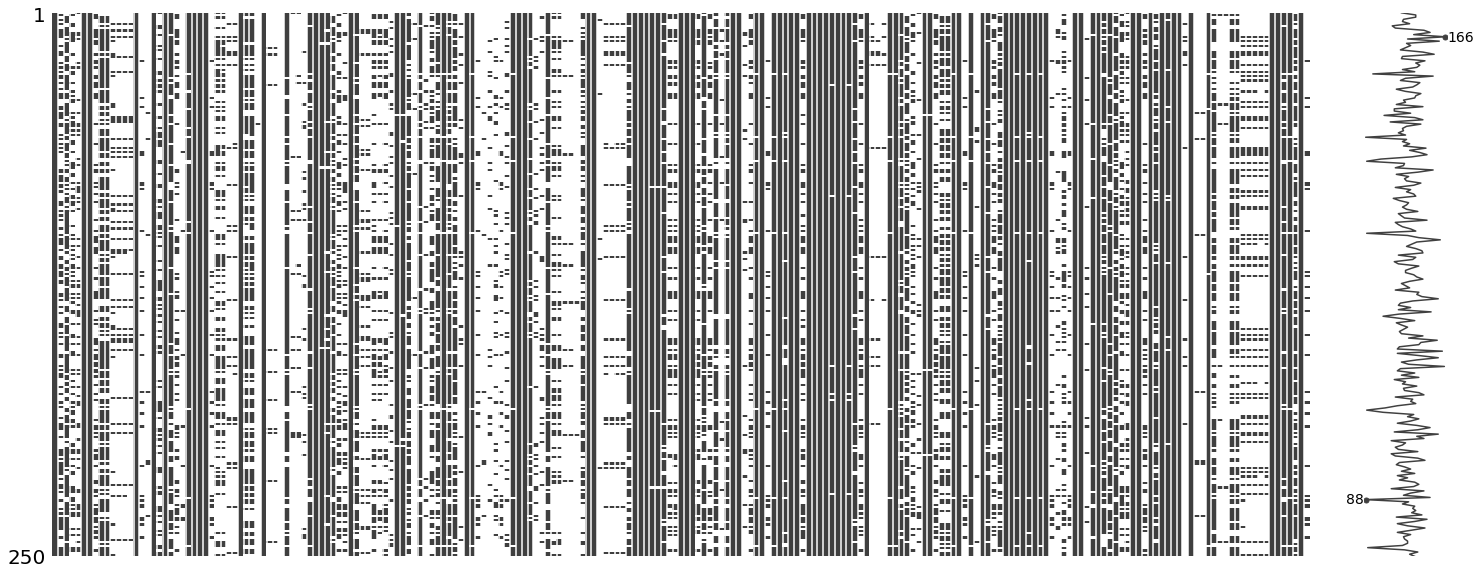

In [22]:
# Import Missingno Package
import missingno as msno
%matplotlib inline
msno.matrix(db.sample(250))

Lots of holes, likely these are more qualitative in nature and were indicated in the data dictionary.  Some do seem to be complete or nearly complete.  I'll have to investigate further.

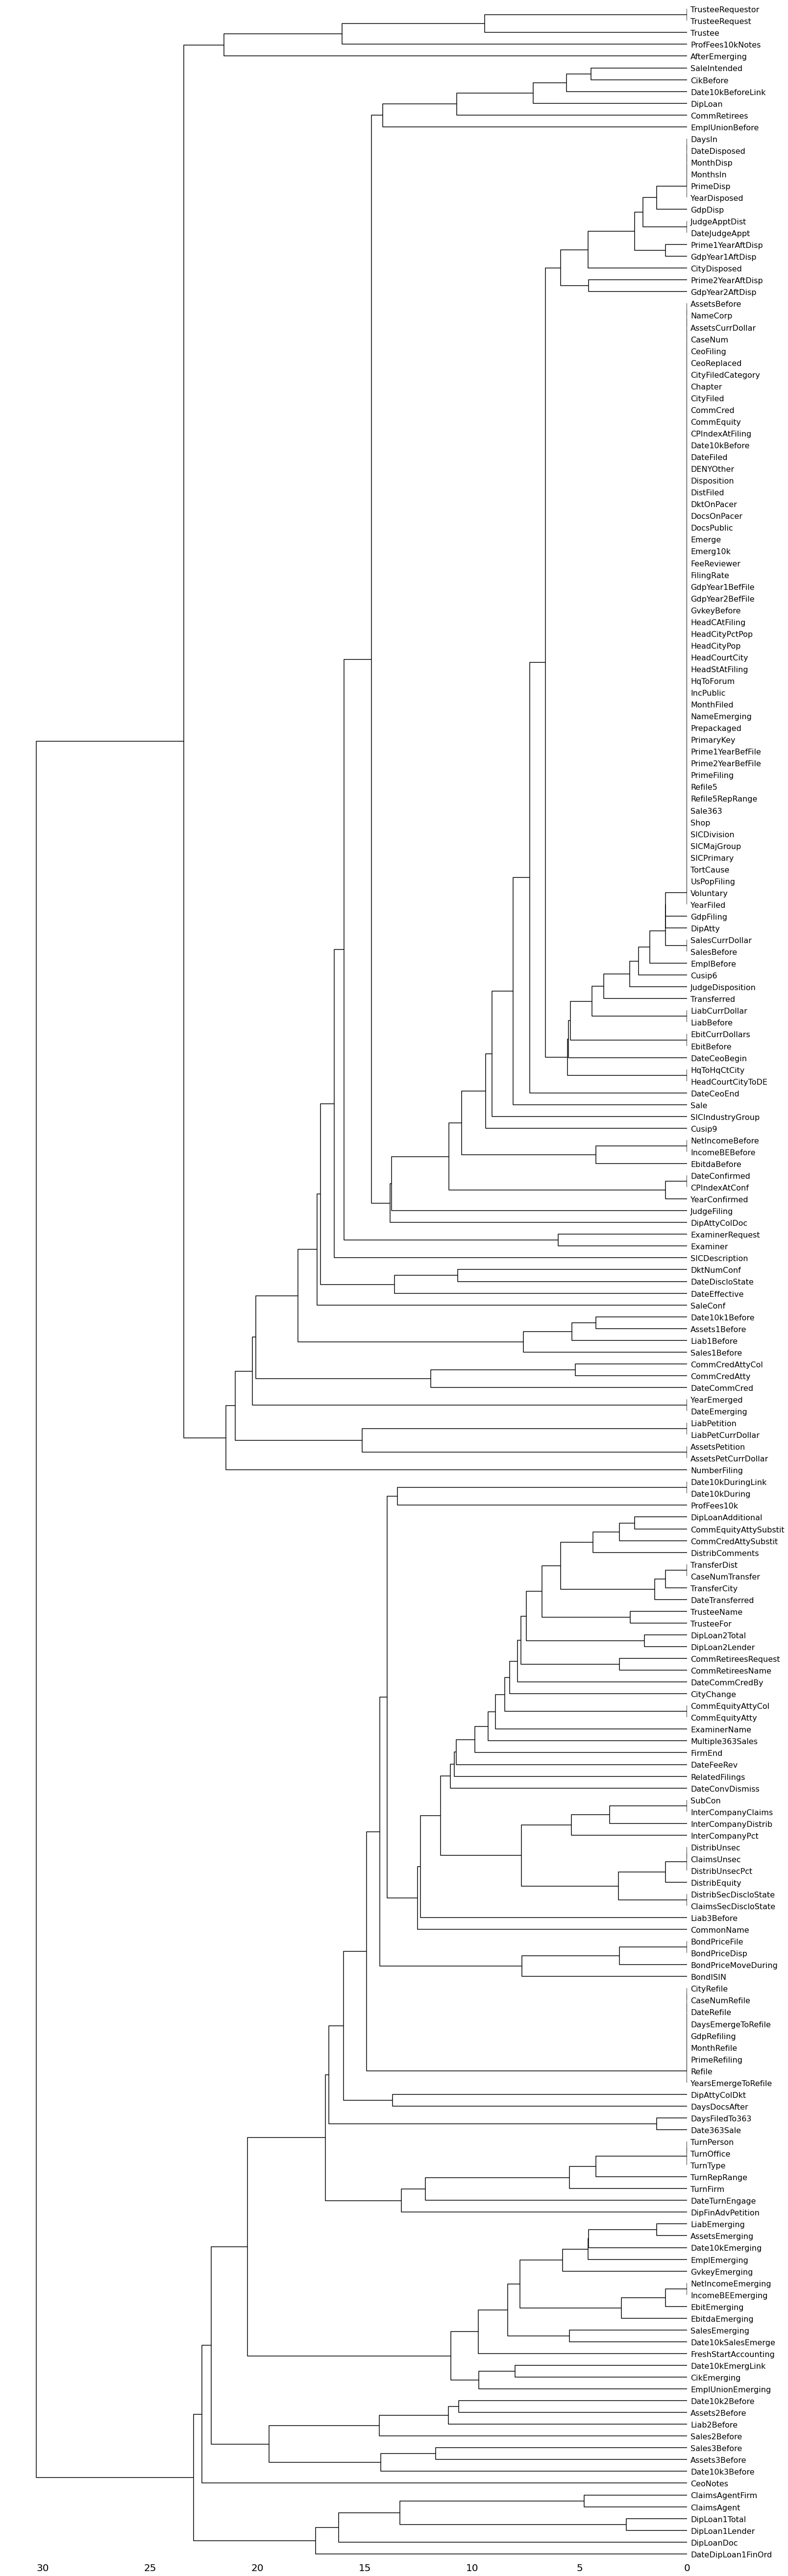

In [24]:
# This dendrogram claims to show me nullity correlation.  If they correlate the bar closest to the names will be full.  
# The lines further away from the chart means they dont vary in the same way
msno.dendrogram(db)

****

I have some main variables that I will explore further that I forsee being impactful for my potential analysis:

MonthsIn, Assets Before, AssetsCurrDollar, Chapter, Emerge, MonthFiled, Year, TortCause, SalesCurrDollar, Sale, NetIncomeBefore/Emerging,EBIT/EBITDA - Before/Emerging

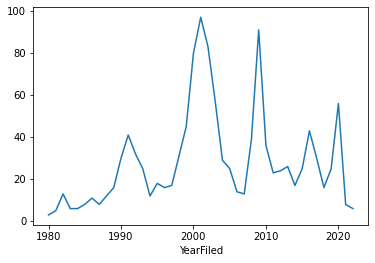

In [34]:
# When did the bankruptcies occur? Count the bankruptcies by year


db.groupby('YearFiled')['NameCorp'].count().plot()

It makes sense that there were a bunch of bankruptcy filings around 2001 (.com bust), 2009 (Financial Crisis), and 2020 (Covid Pandemic).  Investigating the types of company to go bust in each would be an interesting point of analysis.

In [37]:
#How many of the cases in here are Chapter 7 (liqudation) vs Chapter 11 (reorganization)

db.groupby('Chapter')['YearFiled'].count()

Chapter
11                     1190
7                        25
no order for relief       3
Name: YearFiled, dtype: int64

I'm not surprised that the vast majority of cases here are filed for Ch 11, otherwise known as restructuring.  You've got to be really bad to go straight to Ch 7, liquidation.

In [66]:
# What does this look like by year? (Tried to make a histogram but it wouldn't render nicely so the table is easier to read)
db.groupby('YearFiled', as_index = True)['Chapter'].value_counts()

YearFiled  Chapter            
1980       11                      3
1981       11                      5
1982       11                     13
1983       11                      6
1984       11                      6
1985       11                      8
1986       11                     11
1987       11                      8
1988       11                     12
1989       11                     16
1990       11                     30
1991       11                     41
1992       11                     32
1993       11                     25
1994       11                     11
           no order for relief     1
1995       11                     18
1996       11                     16
1997       11                     17
1998       11                     31
1999       11                     45
2000       11                     80
2001       11                     97
2002       11                     81
           no order for relief     2
2003       11                     56
       

Interesting that there are no recorded Ch7 bankruptcies until 2003 (Enron?).  There are much more in the 2008 era, I imagine these are insolvent financial companies, whose remaining assets would be much easier to liquidate.  Will double click on company type when I look at this aspect again.

***
# How long do bankruptcies last?

Looks like I have to look at this separately between the companies that 'remerged' (were not broken up and sold) versus those that were sold in some capacity (referred to as 363)

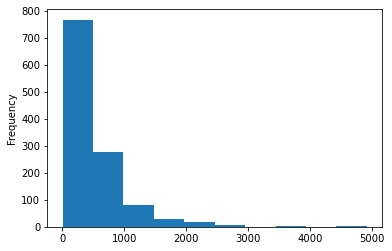

In [75]:
#Dates to rememrge

db['DaysIn'].plot.hist()

This is kinda hard to read, the box plot was also unhelpful.  Clearly most reorganization bankruptcies are resolved in under 500 days.

In [76]:
db['DaysIn'].describe()

count    1182.000000
mean      485.708968
std       518.665295
min         4.000000
25%       148.250000
50%       342.500000
75%       616.000000
max      4911.000000
Name: DaysIn, dtype: float64

Looks like the average reorganization takes 485 days.  There's a lot of skew here, however, the median is 342.5 days.  The long tail will definitely need to be investigated.

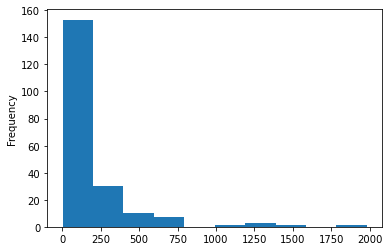

In [81]:
#Looking at cases where there are 363-type sales 
db['DaysFiledTo363'].plot.hist()

Under 250 days is speedy, this may be the nature of selling the viable parts of a business while they're still valuable.  Ch 7 is also such a specific scenario this may indicate that companies pre-arranged sales of assets before they even filed for bankruptcy, thus expiditing the process.

In [103]:
db['DaysFiledTo363'].loc[~db['DaysFiledTo363'].isna()]

4         56.0
7         54.0
11        50.0
13       193.0
16      1464.0
         ...  
1183     197.0
1186     760.0
1190     252.0
1201     245.0
1207     593.0
Name: DaysFiledTo363, Length: 206, dtype: float64

I'm noticing that my list here is 206 values, while the Ch 7 column in the count several cells up said there were only 25 Chapter 7 cases.  Maybe the 25 are 'pure' liquidation cases and the others perhaps sold off only a piece of the business before reorganization? I will need to investiagte this further.

***

I feel I got a good handle on the most meaningful aspects of the data I will explore.  I am also feeling that this 200 column long dataframe is unwieldy.  Thematically, I can already tell that I can break this data up into a few sub groups, namely: financial stats (assets / liabilities / rev / ebitda / net income), corporate info (CEO at filing, city filed, etc), Bankruptcy Dates.  I think subdividing this data may be best done in SQL.  This will also help facilitate the 2023 bankruptcy cases I add by shortening the number of columns I have to update.

In [105]:
# Going to throw this into SQL for future easy querying... so I will helpfully make a table to suit my needs!

print_stmt = pd.io.sql.get_schema(db, 'Bankruptcy')
print(print_stmt)

CREATE TABLE "Bankruptcy" (
"NameCorp" TEXT,
  "AfterEmerging" TEXT,
  "Assets1Before" REAL,
  "Assets2Before" REAL,
  "Assets3Before" REAL,
  "AssetsBefore" REAL,
  "AssetsCurrDollar" INTEGER,
  "AssetsEmerging" REAL,
  "AssetsPetCurrDollar" REAL,
  "AssetsPetition" REAL,
  "BondISIN" TEXT,
  "BondPriceDisp" REAL,
  "BondPriceFile" REAL,
  "BondPriceMoveDuring" REAL,
  "CaseNum" TEXT,
  "CaseNumRefile" TEXT,
  "CaseNumTransfer" TEXT,
  "CeoFiling" TEXT,
  "CeoNotes" TEXT,
  "CeoReplaced" TEXT,
  "CikBefore" REAL,
  "CikEmerging" REAL,
  "CityChange" TEXT,
  "CityDisposed" TEXT,
  "CityFiledCategory" TEXT,
  "Chapter" TEXT,
  "CityFiled" TEXT,
  "CityRefile" TEXT,
  "ClaimsAgent" TEXT,
  "ClaimsAgentFirm" TEXT,
  "ClaimsSecDiscloState" REAL,
  "ClaimsUnsec" REAL,
  "CommCred" TEXT,
  "CommCredAtty" TEXT,
  "CommCredAttyCol" TEXT,
  "CommCredAttySubstit" TEXT,
  "CommEquity" TEXT,
  "CommEquityAtty" TEXT,
  "CommEquityAttyCol" TEXT,
  "CommEquityAttySubstit" TEXT,
  "CommRetirees" TEXT,